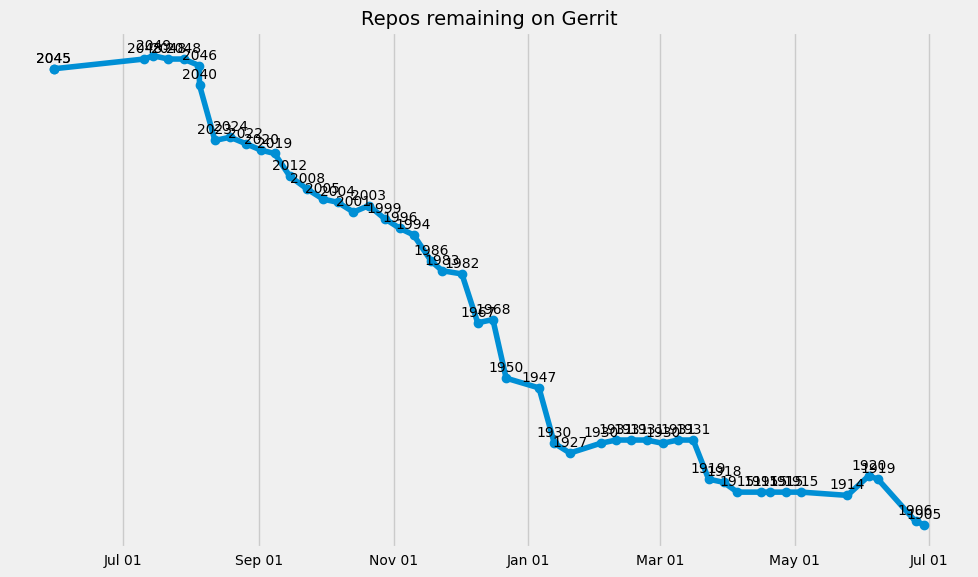

In [1]:
import subprocess
import re
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

git_log_output = subprocess.check_output(['git', 'log', '--pretty=format:%s (repos: %b)'])

commit_dates = []
repos_count = []

# match: 2023-10-06T15:47:37+00:00 (repos: 2004 434 337 92)
pattern = r'(\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}\+\d{2}:\d{2}) \(repos: (\d+)'

for line in git_log_output.decode('utf-8').split('\n'):
    match = re.search(pattern, line)
    if match:
        commit_date = datetime.strptime(match.group(1), '%Y-%m-%dT%H:%M:%S%z')
        repo_count = int(match.group(2))
        commit_dates.append(commit_date)
        repos_count.append(repo_count)

with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(commit_dates, repos_count, marker='o', linestyle='-')
    ax.set_title('Repos remaining on Gerrit', fontsize=14)

    for i, count in enumerate(repos_count):
        ax.annotate(count, (commit_dates[i], count), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10)

    date_format = mdates.DateFormatter('%b %d')
    ax.xaxis.set_major_formatter(date_format)
    ax.yaxis.set_visible(False)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=10)

    # Save the graph as an image (e.g., PNG)
    plt.tight_layout()
    plt.savefig('repo_count_over_time.png')

    # Display the graph in the Jupyter Notebook
    plt.show()